In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns


In [3]:
df = pd.read_csv('titanic.csv')
test = pd.read_csv('titanic_test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_test_split = [df,test]
for dataset in train_test_split:
    dataset['title'] = dataset['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [7]:
title_mapping = {'Mr': 0, 'Mrs':0, 'Miss':1, 'Master': 1, 'Don': 1, 'Rev':2, 'Dr':2, 'Mme':2, 'Ms':2,
       'Major':2, 'Lady':2, 'Sir':2, 'Mlle':2, 'Col':2, 'Capt':2, 'the Countess':2,
       'Jonkheer':2}
for dataset in train_test_split:
    dataset['title'] = dataset['title'].map(title_mapping)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0


In [10]:
df.drop('Name',axis = 1,inplace = True)
test.drop('Name',axis = 1,inplace = True)

In [11]:
sex_mapping = {'male': 0,'female': 1}
for dataset in train_test_split:
    dataset['Sex'] =dataset['Sex'].map(sex_mapping)

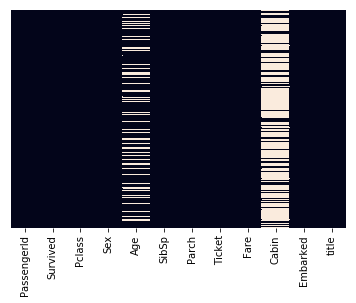

In [12]:
sns.heatmap(df.isnull(),yticklabels = False , cbar = False )

In [13]:
df['Age'].fillna(df.groupby('title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('title')['Age'].transform('median'), inplace = True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
for dataset in train_test_split:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [16]:
embarked_mappng = {'S': 0, 'C':1,'Q':2}
for dataset in train_test_split:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mappng)

In [17]:
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace = True)


In [18]:
df.drop('Cabin',axis = 1,inplace = True)
test.drop('Cabin',axis = 1,inplace = True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0


In [20]:
df['Familysize']  = df['SibSp'] + df['Parch'] + 1
test['Familysize']  = test['SibSp'] + test['Parch'] + 1

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Familysize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,1


In [22]:
df.drop(['SibSp','Parch'],axis = 1,inplace = True)
test.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,title,Familysize
0,1,0,3,0,22.0,A/5 21171,7.2500,0,0,2
1,2,1,1,1,38.0,PC 17599,71.2833,1,0,2
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,1,35.0,113803,53.1000,0,0,2
4,5,0,3,0,35.0,373450,8.0500,0,0,1


In [24]:
df.drop('Ticket',axis = 1,inplace = True)
test.drop('Ticket', axis = 1,inplace = True)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'title', 'Familysize'],
      dtype='object')

In [26]:
X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked','title', 'Familysize']]
y = df['Survived']

In [52]:
from sklearn.cross_validation import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()


In [28]:
lm.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
test.dropna(inplace = True)
test_data = test

In [30]:
predictions = lm.predict(test_data)

In [31]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [32]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

In [33]:
submission.to_csv('submission.csv',index = False)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,predictions)


ValueError: Found input variables with inconsistent numbers of samples: [268, 417]

In [34]:
df.drop('Cabin',axis = 1,inplace =True)

ValueError: labels ['Cabin'] not contained in axis

In [ ]:
def impute_age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
 df['Age'] = df[['Age','Pclass']].apply(impute_age,axis =1)

In [ ]:
df.drop('Name',axis = 1,inplace = True)

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first= True)

In [ ]:
embark = pd.get_dummies(df['Embarked'] ,drop_first = True )


In [ ]:
df =  pd.concat([df,sex,embark],axis =1)

In [ ]:
df

In [ ]:
df.drop(['Sex','Embarked','Ticket'],axis =1,inplace = True)

In [ ]:
df['title'].unique()

In [ ]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'title', 'male', 'Q', 'S']]

In [ ]:
y =  df['Survived']

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle  =True, random_state= 0)

In [ ]:
lm = LogisticRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
scoring = 'accuracy'
score = cross_val_score(lm,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)

In [ ]:
print(score)

In [ ]:
round(np.mean(score)*100,2)

In [ ]:
test_t =  pd.raed_csv('test.csv')

In [ ]:
predictions.size

In [ ]:
pd.DataFrame({'a':df['PassengerId'], 'b':predictions})

In [1]:
import pandas as pd

In [ ]:
pd.read_csv('tr')